In [150]:
!pip3 freeze

anyio==3.3.0
argon2-cffi==20.1.0
attrs==21.2.0
Babel==2.9.1
backcall==0.2.0
bleach==4.0.0
certifi==2021.5.30
cffi==1.14.6
charset-normalizer==2.0.4
colorama==0.4.4
cycler==0.10.0
debugpy==1.4.1
decorator==5.0.9
defusedxml==0.7.1
entrypoints==0.3
future==0.18.2
h2o==3.32.1.6
idna==3.2
ipykernel==6.2.0
ipython==7.26.0
ipython-genutils==0.2.0
jedi==0.18.0
Jinja2==3.0.1
joblib==1.0.1
json5==0.9.6
jsonschema==3.2.0
jupyter-client==7.0.1
jupyter-core==4.7.1
jupyter-server==1.10.2
jupyterlab==3.1.7
jupyterlab-pygments==0.1.2
jupyterlab-server==2.7.2
kiwisolver==1.3.1
MarkupSafe==2.0.1
matplotlib==3.4.3
matplotlib-inline==0.1.2
memory-profiler==0.58.0
mistune==0.8.4
nbclassic==0.3.1
nbclient==0.5.4
nbconvert==6.1.0
nbformat==5.1.3
nest-asyncio==1.5.1
notebook==6.4.3
numpy==1.21.2
packaging==21.0
pandas==1.3.2
pandocfilters==1.4.3
parso==0.8.2
pexpect==4.8.0
pickleshare==0.7.5
Pillow==8.3.1
prometheus-client==0.11.0
prompt-toolkit==3.0.20
psutil==5.8.0
ptyprocess==0.7.0
pycparser==2.20
Pygments

In [151]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import re

# Plot general boxplots

In [152]:
df_all = pd.read_csv("../../data/50_models_all.csv")
df_IA = pd.read_csv("../../data/50_models_only_IA.csv")

In [153]:
sns.set_palette("pastel")

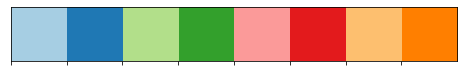

In [154]:
custom_palette = sns.color_palette("Paired", 8)
sns.palplot(custom_palette)

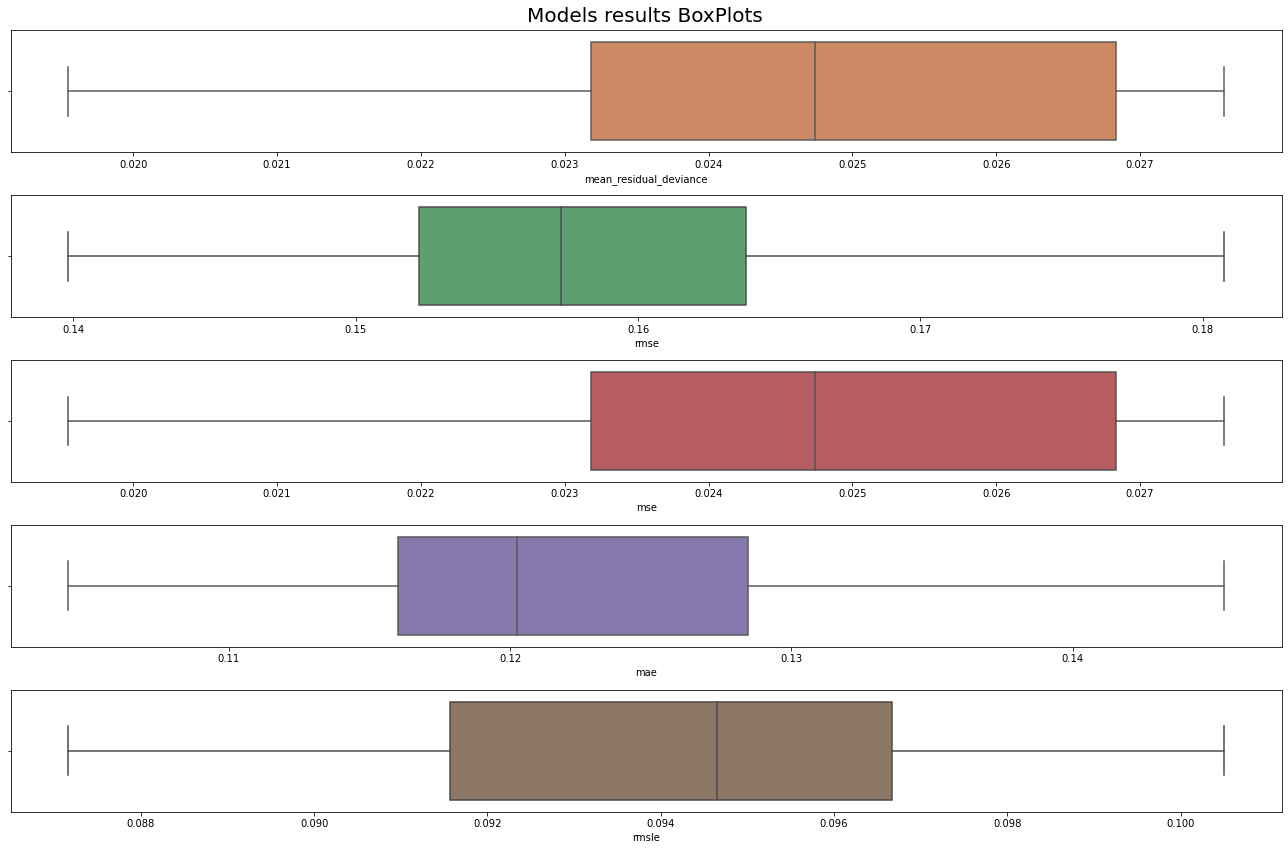

In [155]:
size = (18, 12)
title = "Models results BoxPlots"
fig, axs = plt.subplots(nrows=len(df_all.columns)-1, ncols=1, figsize=size)
fig.suptitle(title, fontsize=20)
custom_palette = sns.color_palette("deep", 8)

for i, col in enumerate(df_all.columns):
    if i == 0:
        continue
    sns.boxplot(
        x=df_all[col],
        showfliers = False,
        color=custom_palette[i],
        ax=axs[i-1]
    )
    fig.tight_layout()

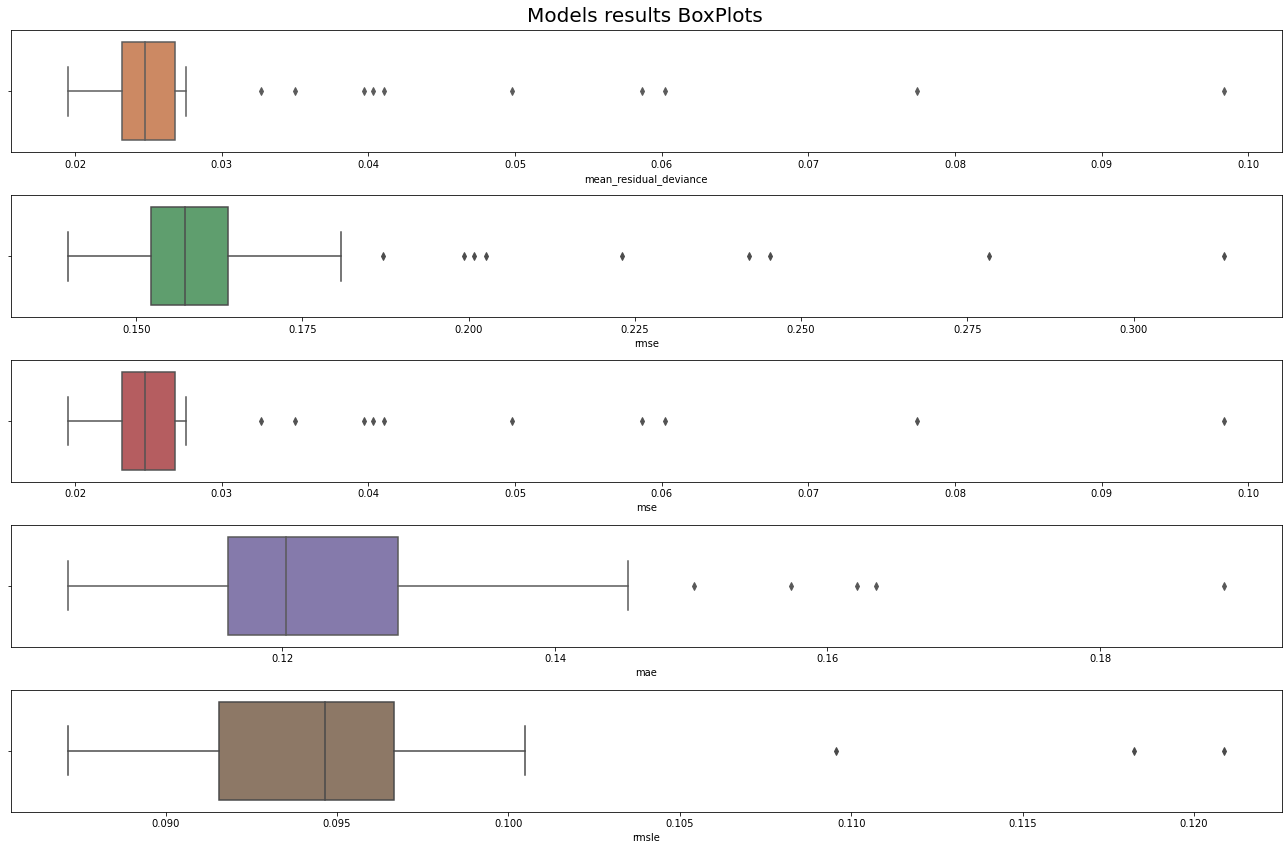

In [156]:
size = (18, 12)
title = "Models results BoxPlots"
fig, axs = plt.subplots(nrows=len(df_all.columns)-1, ncols=1, figsize=size)
fig.suptitle(title, fontsize=20)
custom_palette = sns.color_palette("deep", 8)

for i, col in enumerate(df_all.columns):
    if i == 0:
        continue
    sns.boxplot(
        x=df_all[col],
        showfliers = True,
        color=custom_palette[i],
        ax=axs[i-1]
    )
    fig.tight_layout()

# Plor boxplot per family

In [157]:
def labeling_model(
    df:pd.DataFrame
):
    df["Family"] = df["model_id"].apply(
        lambda x: re.findall('^[^_]+(?=_)', x)[0]
    )
    return None

In [158]:
labeling_model(df_all)
labeling_model(df_IA)

In [159]:
mask_all = df_all["model_id"].apply(lambda x: x.startswith(("XGBoost", "GBM", "DeepLearning")))
df_all.columns = [x.upper() for x in df_all.columns]


In [160]:
mask_IA = df_IA["model_id"].apply(lambda x: x.startswith(("XGBoost", "GBM", "DeepLearning")))
df_IA.columns = [x.upper() for x in df_IA.columns]

In [161]:
# size = (20, 30)
# title = "Families results boxplots - All objects"
# fig, axs = plt.subplots(nrows=len(df_all.columns)-2, ncols=1, figsize=size)
# fig.suptitle(title, fontsize=20)
# custom_palette = sns.color_palette("deep", 8)

# for i, col in enumerate(df_all.columns[1:-1]):
#     sns.boxplot(
#         x=col,
#         y="family",
#         data=df_all,
#         showfliers = False,
#         color=custom_palette[i],
#         ax=axs[i-2]
#     )
# plt.savefig('../../data/boxplot_families_all.pdf') 

In [162]:
# size = (20, 30)
# title = "Families results boxplots - Only IA"
# fig, axs = plt.subplots(nrows=len(df_IA.columns)-2, ncols=1, figsize=size)
# fig.suptitle(title, fontsize=20)
# custom_palette = sns.color_palette("deep", 8)

# for i, col in enumerate(df_IA.columns[1:-1]):
#     sns.boxplot(
#         x=col,
#         y="family",
#         data=df_all,
#         showfliers = True,
#         color=custom_palette[i],
#         ax=axs[i-2]
#     )
# plt.savefig('../../data/boxplot_families_IA.pdf') 

In [168]:
df_IA[mask_IA].head()

,MODEL_ID,MEAN_RESIDUAL_DEVIANCE,RMSE,MSE,MAE,RMSLE,FAMILY
2,GBM_3_AutoML_20201223_115349,0.008417,0.091745,0.008417,0.070339,0.053158,GBM
3,GBM_4_AutoML_20201223_115349,0.008438,0.091859,0.008438,0.070331,0.053124,GBM
4,DeepLearning_grid__3_AutoML_20201223_115349_mo...,0.008541,0.092416,0.008541,0.072869,0.054066,DeepLearning
5,GBM_2_AutoML_20201223_115349,0.008572,0.092587,0.008572,0.071508,0.053464,GBM
6,GBM_grid__1_AutoML_20201223_115349_model_2,0.008648,0.092993,0.008648,0.071424,0.053785,GBM


In [167]:
df_all[mask_all].head()

,MODEL_ID,MEAN_RESIDUAL_DEVIANCE,RMSE,MSE,MAE,RMSLE,FAMILY
2,GBM_4_AutoML_20210513_234908,0.021811,0.147686,0.021811,0.112292,0.089323,GBM
3,XGBoost_grid__1_AutoML_20210513_234908_model_1,0.022044,0.148472,0.022044,0.112691,0.089761,XGBoost
4,GBM_5_AutoML_20210513_234908,0.022130,0.148762,0.022130,0.114066,0.090107,GBM
5,GBM_2_AutoML_20210513_234908,0.022182,0.148936,0.022182,0.114009,0.090068,GBM
6,GBM_3_AutoML_20210513_234908,0.022215,0.149046,0.022215,0.113839,0.090120,GBM


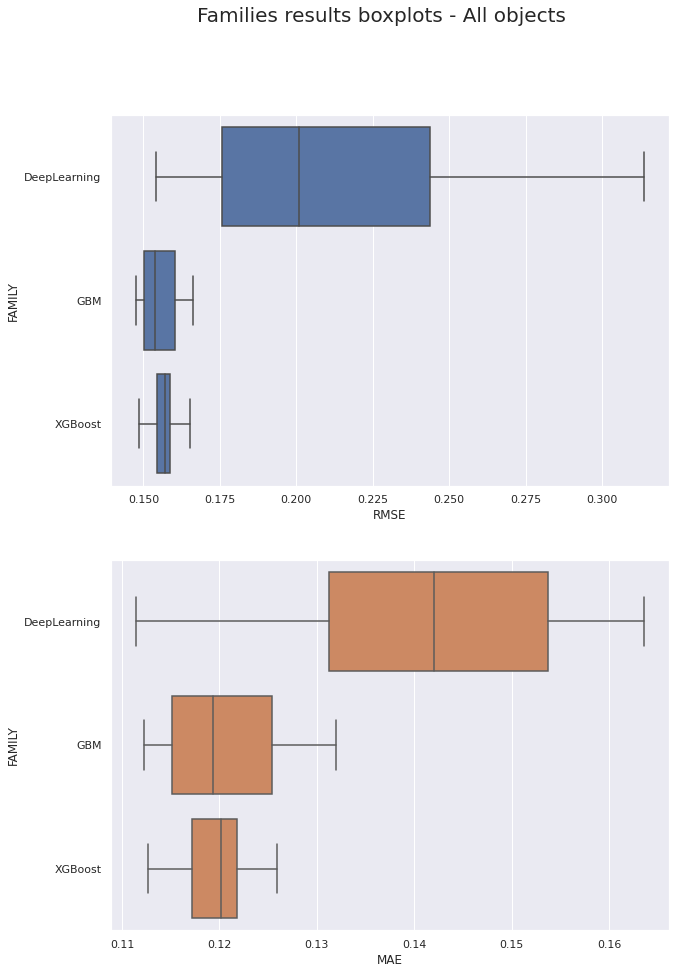

In [176]:
sns.set(font_scale=1)


size = (10, 15)
title = "Families results boxplots - All objects"
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=size)
fig.suptitle(title, fontsize=20)
custom_palette = sns.color_palette("deep", 8)

for i, col in enumerate(['RMSE', 'MAE']):
    sns.boxplot(
        x=col,
        y="FAMILY",
        data=df_all[mask_all].sort_values('MODEL_ID'),
        showfliers = False,
        color=custom_palette[i],
        ax=axs[i-2]
    )
plt.savefig('../../data/boxplot_families_all.pdf') 

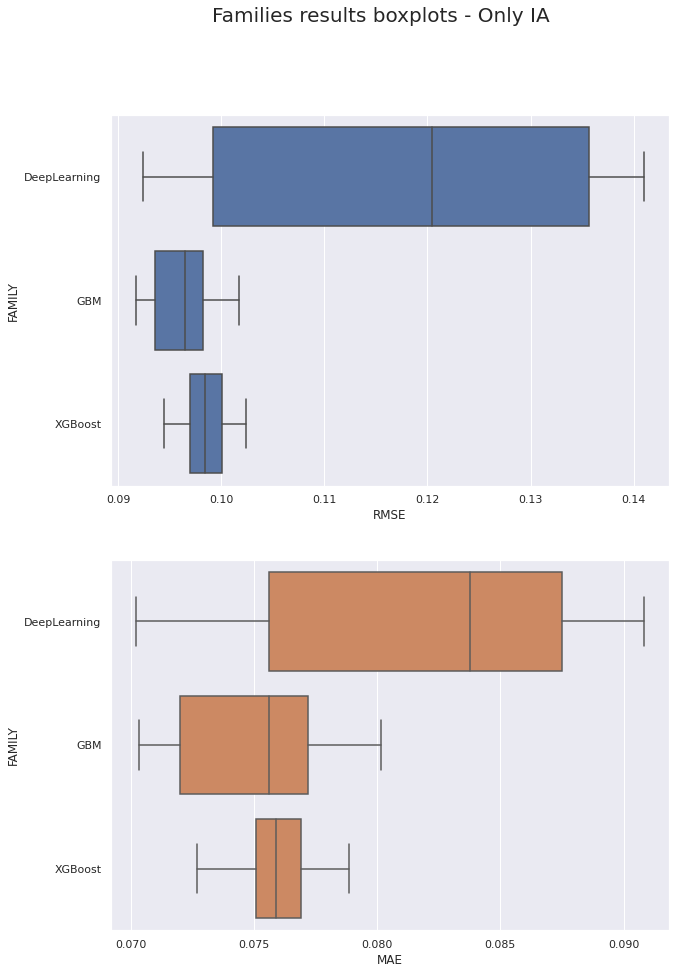

In [175]:
sns.set(font_scale=1)

size = (10, 15)
title = "Families results boxplots - Only IA"
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=size)
fig.suptitle(title, fontsize=20)
custom_palette = sns.color_palette("deep", 8)

for i, col in enumerate(['RMSE', 'MAE']):
    sns.boxplot(
        x=col,
        y="FAMILY",
        data=df_IA[mask_IA].sort_values('MODEL_ID'),
        showfliers = False,
        color=custom_palette[i],
        ax=axs[i-2]
    )
plt.savefig('../../data/boxplot_families_IA.pdf') 